#  Website traffic prediction and comparing the different ML model

## Rahul Manjhi

In [73]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Dataset Exploration:

In [13]:
data =  pd.read_csv("website_traffic.csv")

In [15]:
data


,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [17]:
missing = data.isnull()

In [19]:
missing

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False


In [21]:
coun_missing_values = data.isnull().sum()

In [23]:
coun_missing_values

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

In [25]:
summary_statistics = data.describe()


In [27]:
summary_statistics

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [29]:
coun_missing_values, summary_statistics


(Page Views          0
 Session Duration    0
 Bounce Rate         0
 Traffic Source      0
 Time on Page        0
 Previous Visits     0
 Conversion Rate     0
 dtype: int64,
         Page Views  Session Duration  Bounce Rate  Time on Page  \
 count  2000.000000       2000.000000  2000.000000   2000.000000   
 mean      4.950500          3.022045     0.284767      4.027439   
 std       2.183903          3.104518     0.159781      2.887422   
 min       0.000000          0.003613     0.007868      0.068515   
 25%       3.000000          0.815828     0.161986      1.935037   
 50%       5.000000          1.993983     0.266375      3.315316   
 75%       6.000000          4.197569     0.388551      5.414627   
 max      14.000000         20.290516     0.844939     24.796182   
 
        Previous Visits  Conversion Rate  
 count      2000.000000      2000.000000  
 mean          1.978500         0.982065  
 std           1.432852         0.065680  
 min           0.000000         0.3436

In [32]:
# Perform one-hot encoding on the 'Traffic Source' categorical variable
df_encoded = pd.get_dummies(data, columns=['Traffic Source'], drop_first=True)


In [34]:
df_encoded.head(10)


,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,Traffic Source_Organic,Traffic Source_Paid,Traffic Source_Referral,Traffic Source_Social
0,5,11.051381,0.230652,3.890460,3,1.0,True,False,False,False
1,4,3.429316,0.391001,8.478174,0,1.0,False,False,False,True
2,4,1.621052,0.397986,9.636170,2,1.0,True,False,False,False
3,5,3.629279,0.180458,2.071925,3,1.0,True,False,False,False
4,5,4.235843,0.291541,1.960654,5,1.0,False,True,False,False
5,3,4.541868,0.420740,3.438712,2,1.0,False,False,False,True
6,5,1.949558,0.034978,2.119271,1,1.0,False,False,False,True
7,4,1.685740,0.252343,3.478016,5,1.0,False,True,False,False
8,6,0.033268,0.120703,5.285519,1,1.0,True,False,False,False
9,7,7.833742,0.212727,4.060115,5,1.0,False,True,False,False


In [37]:
# Set up the plotting environment
sns.set(style="whitegrid")

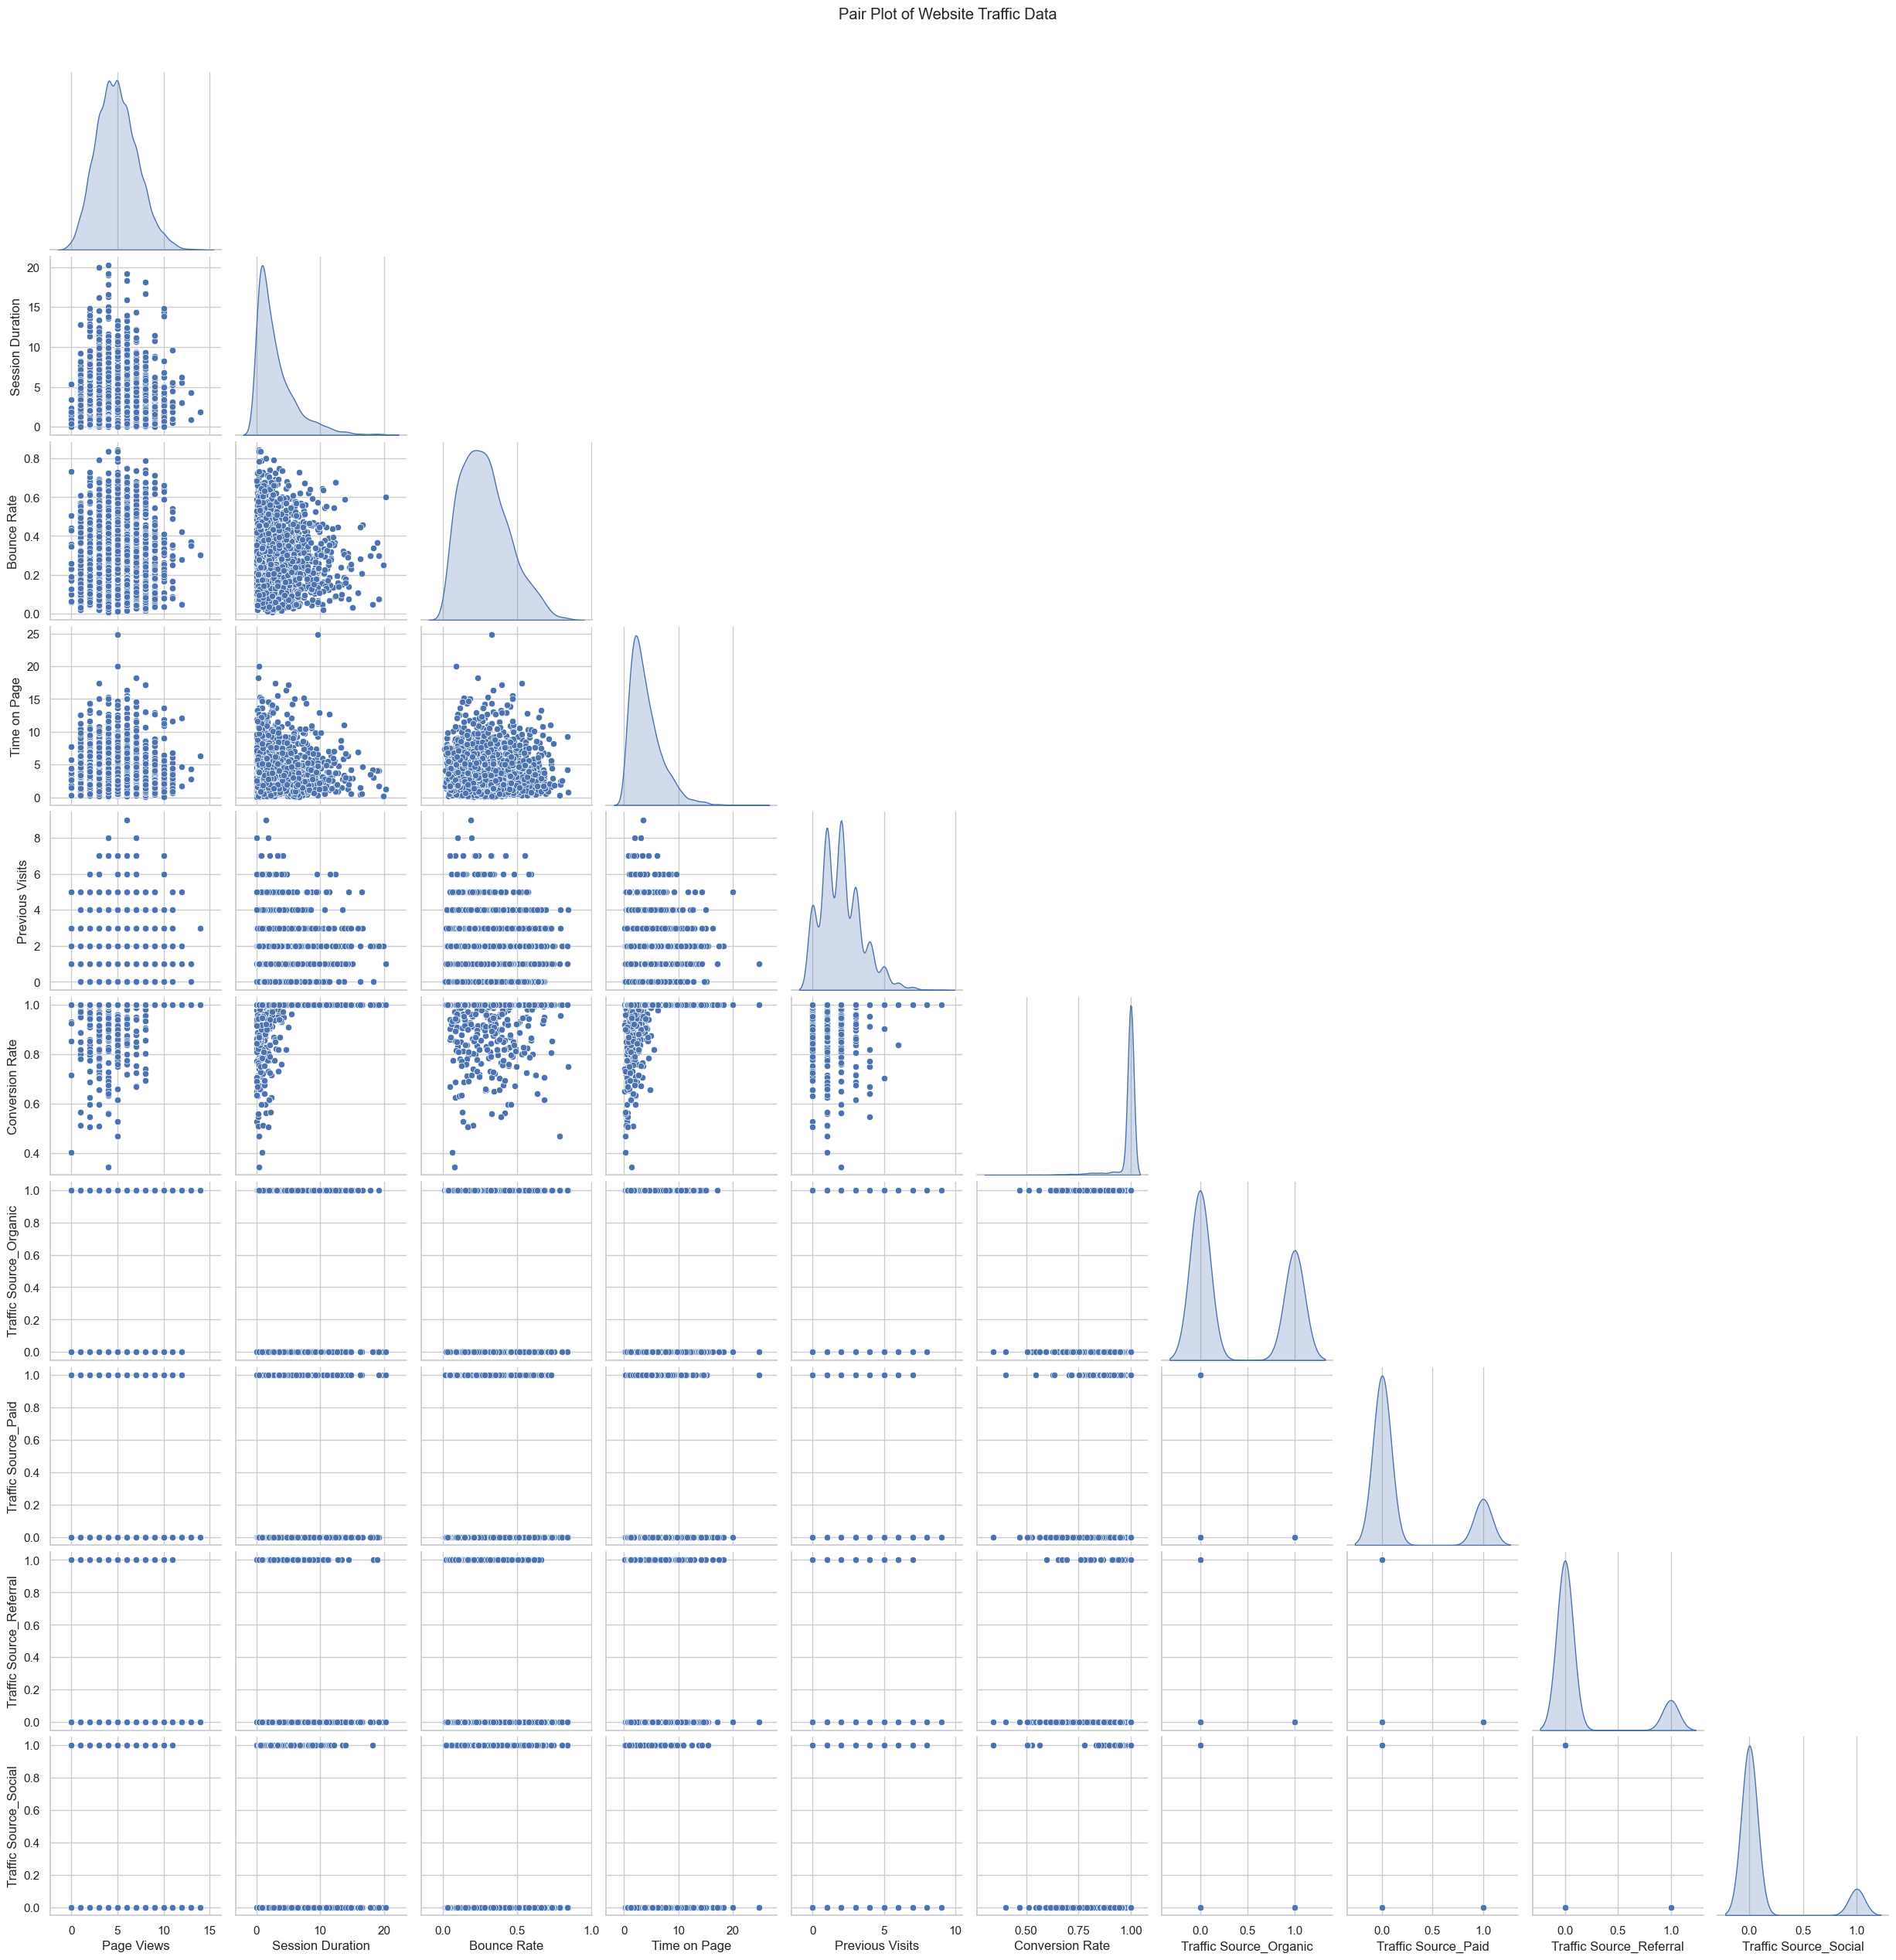

In [39]:
# Scatter plot matrix (pair plot) to visualize relationships between numeric variables
sns.pairplot(df_encoded, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Website Traffic Data', y=1.02)
plt.show()

# Multiple Linear Regression:


In [56]:
# Define the features (X) and target (y)
X = df_encoded.drop(columns=['Conversion Rate'])
y = df_encoded['Conversion Rate']



In [58]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Multiple Linear Regression model
model = LinearRegression()

In [60]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)


In [65]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [67]:
# Calculate adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mae, mse, rmse, r2, adjusted_r2

(0.03163385542916112,
 0.0027909306686198193,
 0.0528292595880334,
 0.10626266875894574,
 0.0856379611149215)

# Polynomial Regression

In [75]:
# Polynomial transformation (degree 2 or 3)
degree = 2  # or 3 for higher-degree polynomial
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [77]:
# Fit the linear regression model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

# Predict on the test set
y_pred_poly = model_poly.predict(X_poly_test)

In [79]:
# Evaluate the model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)


In [81]:
# Calculate adjusted R-squared
n = X_test.shape[0]
p = X_poly_test.shape[1]  # Account for the new number of features in the polynomial model
adjusted_r2_poly = 1 - (1 - r2_poly) * (n - 1) / (n - p - 1)

In [83]:
# Output results
print("Polynomial Regression (degree {}):".format(degree))
print(f"MAE: {mae_poly}")
print(f"MSE: {mse_poly}")
print(f"RMSE: {rmse_poly}")
print(f"R²: {r2_poly}")
print(f"Adjusted R²: {adjusted_r2_poly}")

Polynomial Regression (degree 2):
MAE: 0.02912565018405664
MSE: 0.0024035453442120837
RMSE: 0.04902596602018244
R²: 0.2303147385186486
Adjusted R²: 0.10725459496785117


# Insights and Reporting


## 1. Plotting Actual vs Predicted Values


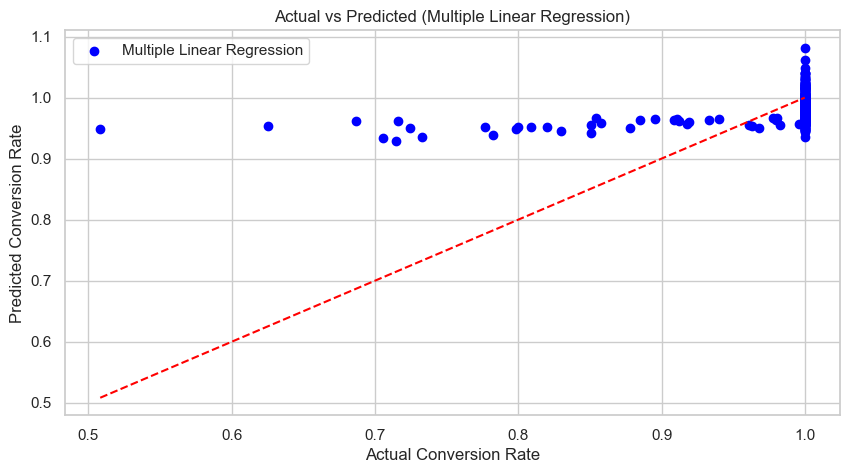

In [86]:
# Plot actual vs predicted for Multiple Linear Regression
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='blue', label='Multiple Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.title('Actual vs Predicted (Multiple Linear Regression)')
plt.legend()
plt.show()

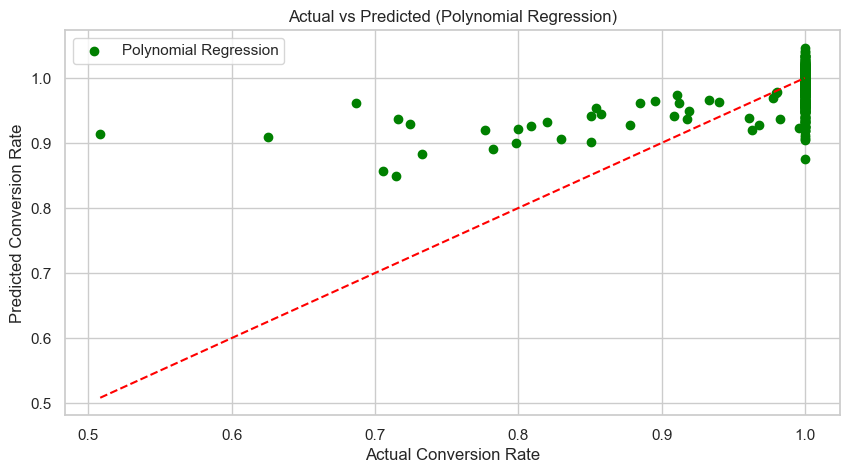

In [88]:
# Plot actual vs predicted for Polynomial Regression
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_poly, color='green', label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.legend()
plt.show()

## 2. Residual Plot


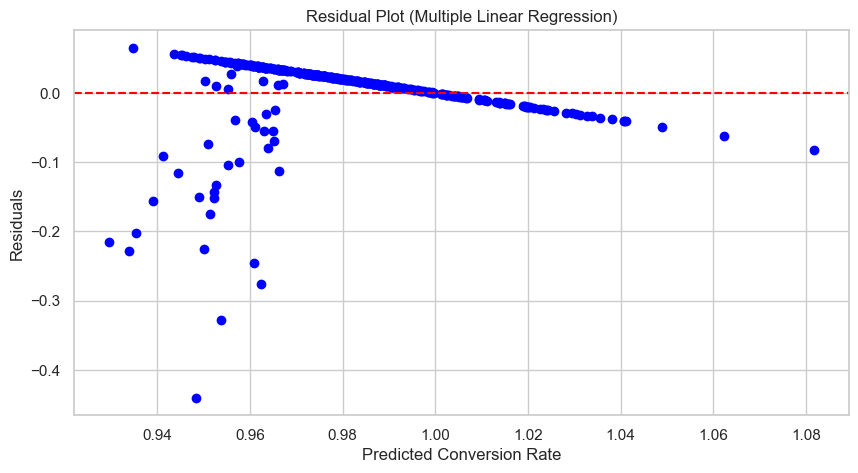

In [92]:
# Residual plot for Multiple Linear Regression
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Conversion Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot (Multiple Linear Regression)')
plt.show()


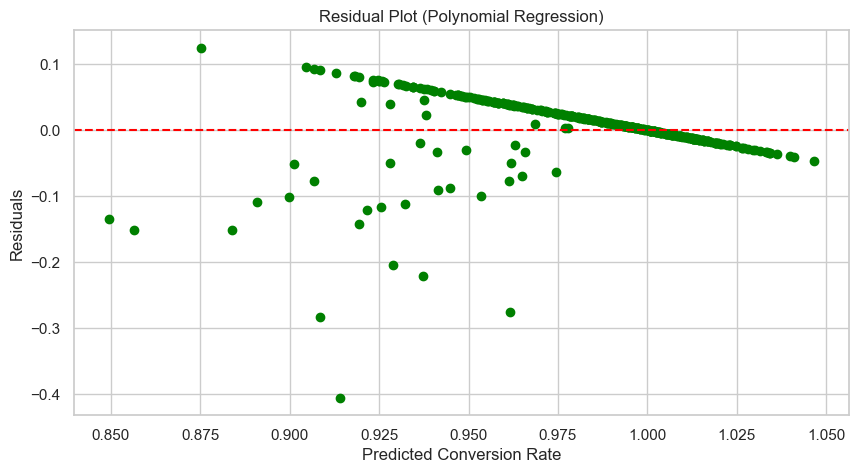

In [94]:
# Residual plot for Polynomial Regression
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(10,5))
plt.scatter(y_pred_poly, residuals_poly, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Conversion Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot (Polynomial Regression)')
plt.show()

## 3. Plot Polynomial Curve


In [97]:
# Sort the test data to get a smooth curve
sorted_indices = np.argsort(X_test['Session Duration'])
X_test_sorted = X_test['Session Duration'].values[sorted_indices]
y_test_sorted = y_test.values[sorted_indices]
y_pred_poly_sorted = y_pred_poly[sorted_indices]

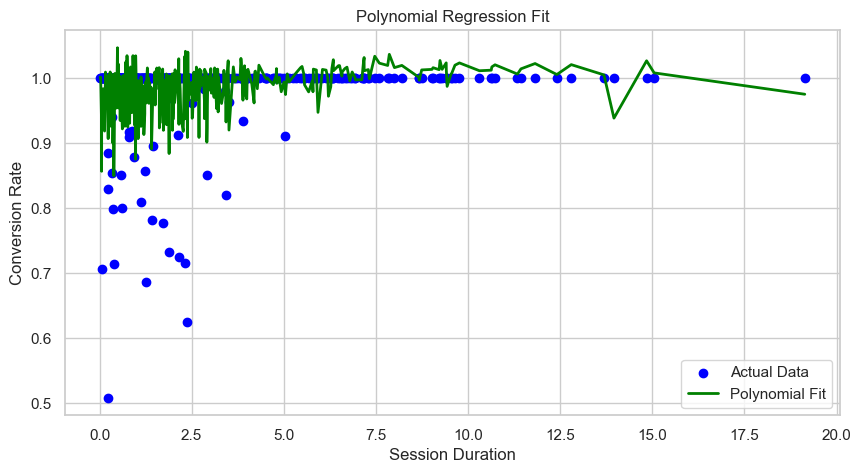

In [99]:
# Plot polynomial regression curve
plt.figure(figsize=(10,5))
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Data')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', label='Polynomial Fit', linewidth=2)
plt.xlabel('Session Duration')
plt.ylabel('Conversion Rate')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Conclusion and Reporting:


### 1 Summary of Findings:

#### 2 Next Steps for Analysis and Model Building:

